In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:\\Users\\siddh\\Downloads\\Master Thesis\\Chatbot 2\\DATA\\dataset_100k.csv"
df = pd.read_csv(file_path)

# Drop duplicates & empty rows
df.drop_duplicates(inplace=True)
df.dropna(how="all", inplace=True)
df.fillna("", inplace=True)

# Standardize column names
df.columns = df.columns.str.strip()

# Define new column order
column_order = [
    "Ticket ID", "Customer Name", "Customer Email", "Customer Age", "Customer Gender",
    "category", "product_name", "product_description", "input_text", "output_text"
]
df = df[[col for col in column_order if col in df.columns]]  

# Function to clean text
def clean_text(text):
    text = str(text).lower().strip()  
    text = re.sub(r"http\S+|www.\S+", "", text)  
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)  
    return text

# Apply text cleaning
df["input_text"] = df["input_text"].apply(clean_text)
df["output_text"] = df["output_text"].apply(clean_text)

# Save cleaned dataset
cleaned_file_path = "C:\\Users\\siddh\\Downloads\\Master Thesis\\Chatbot 2\\DATA\\cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f" Cleaned dataset saved to {cleaned_file_path}")


✅ Cleaned dataset saved to C:\Users\siddh\Downloads\Master Thesis\Chatbot 2\DATA\cleaned_dataset.csv


C:\Users\siddh\AppData\Local\Temp\ipykernel_2904\868569578.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="coolwarm")


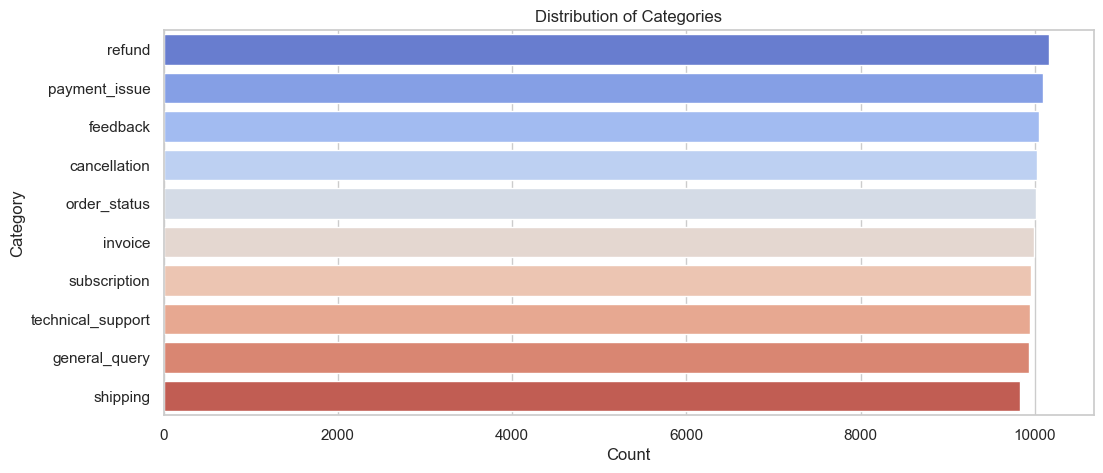

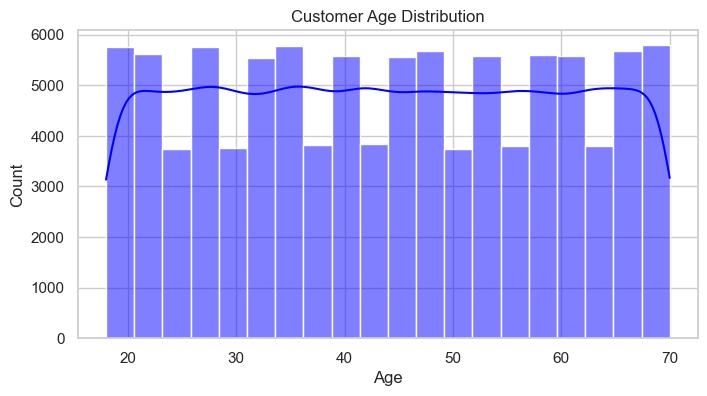

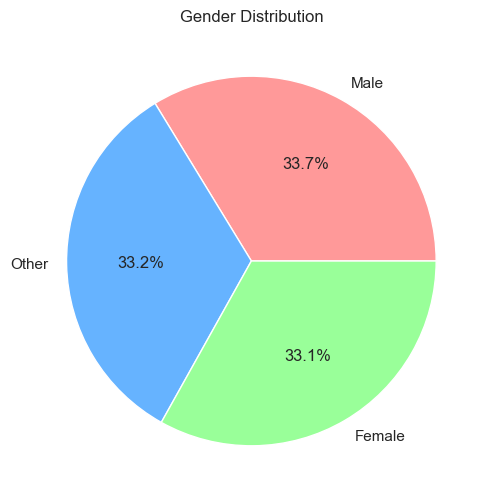

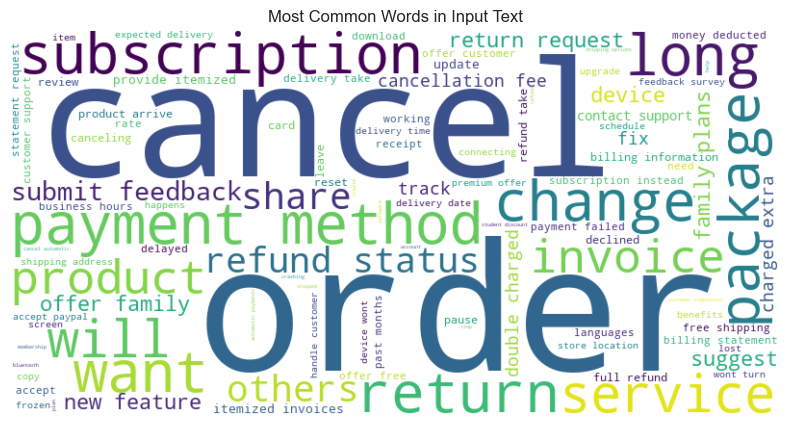

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("C:\\Users\\siddh\\Downloads\\Master Thesis\\Chatbot 2\\DATA\\cleaned_dataset.csv")

# Set style
sns.set(style="whitegrid")

# Category distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Customer Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Customer Age"], bins=20, kde=True, color="blue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#  Gender Distribution
plt.figure(figsize=(6, 6))
df["Customer Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#FF9999", "#66B3FF", "#99FF99"])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

#  Word Cloud for Input Text
text = " ".join(df["input_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Input Text")
plt.show()
